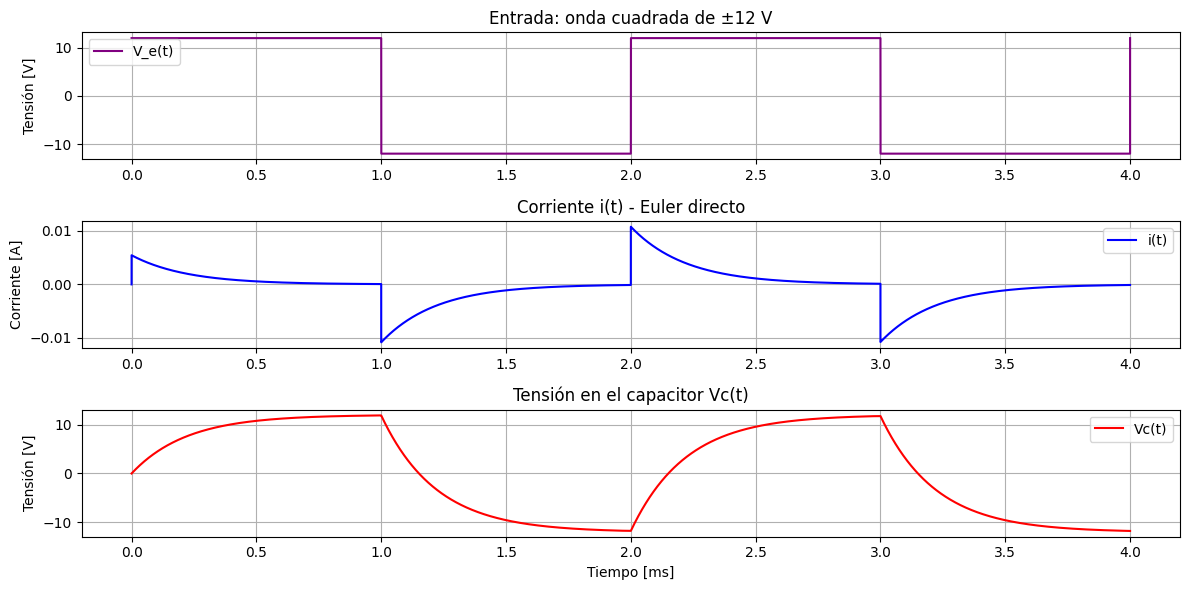

In [7]:
# Simulación numérica con entrada alternante usando Euler directo
# TP1 - Actividad 3

import numpy as np
import matplotlib.pyplot as plt

# ----- Parámetros del sistema -----
R = 2200        # Ohm
L = 10e-6       # H
C = 100e-9      # F
Ve_amp = 12     # Amplitud de la señal escalón (onda cuadrada)

# Tiempo de simulación
h = 1e-9  # paso de integración (1 us)
t_final = 0.004  # 10 ms para ver varios ciclos
N = int(t_final / h)
t = np.linspace(0, t_final, N+1)

# Inicialización de variables
i = np.zeros(N+1)
Vc = np.zeros(N+1)
Ve = np.zeros(N+1)  # entrada alternante

# Construcción de onda cuadrada
for n in range(N+1):
    if int(t[n] * 1000) % 2 == 0:  # cada 1 ms cambia de signo
        Ve[n] = Ve_amp
    else:
        Ve[n] = -Ve_amp

# Simulación con Euler directo
for n in range(N):
    di_dt = (-R/L) * i[n] - (1/L) * Vc[n] + (1/L) * Ve[n]
    dVc_dt = (1/C) * i[n]

    i[n+1] = i[n] + h * di_dt
    Vc[n+1] = Vc[n] + h * dVc_dt

# ----- Gráficos -----
plt.figure(figsize=(12, 6))

# Entrada Ve(t)
plt.subplot(3, 1, 1)
plt.plot(t * 1000, Ve, label='V_e(t)', color='purple')
plt.title('Entrada: onda cuadrada de ±12 V')
plt.ylabel('Tensión [V]')
plt.grid(True)
plt.legend()

# Corriente i(t)
plt.subplot(3, 1, 2)
plt.plot(t * 1000, i, label='i(t)', color='blue')
plt.title('Corriente i(t) - Euler directo')
plt.ylabel('Corriente [A]')
plt.grid(True)
plt.legend()

# Tensión en el capacitor Vc(t)
plt.subplot(3, 1, 3)
plt.plot(t * 1000, Vc, label='Vc(t)', color='red')
plt.title('Tensión en el capacitor Vc(t)')
plt.xlabel('Tiempo [ms]')
plt.ylabel('Tensión [V]')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
